In [1]:
import os
import pandas as pd
from PIL import Image
import torch
import kagglehub
from sklearn.metrics import accuracy_score

from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



from torch.utils.data import DataLoader
from torchvision import transforms

C:\Users\nikio\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# EDA

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
path = kagglehub.dataset_download("alessiocorrado99/animals10")+"\\raw-img"

print("Path to dataset files:", path)

Path to dataset files: C:\Users\nikio\.cache\kagglehub\datasets\alessiocorrado99\animals10\versions\2\raw-img


Animals type 

In [4]:
clases = os.listdir(path)
print(clases)

['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


Num of photos in each folder

In [5]:
for cl in clases:
    a = path+"\\"+cl
    print(len(os.listdir(a)))

4863
2623
1446
2112
3098
1668
1866
1820
4821
1862


See what we have in dataset

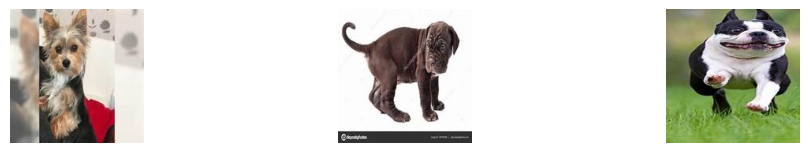

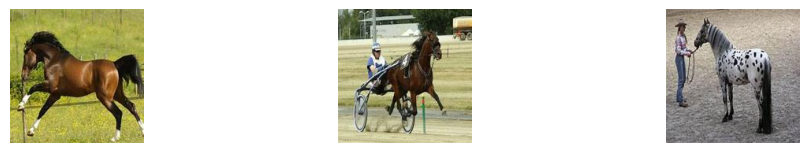

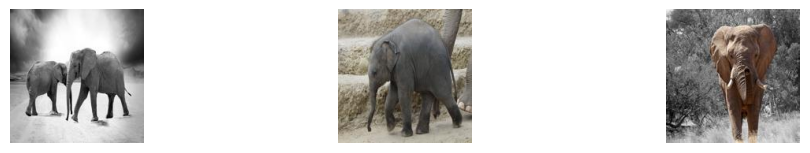

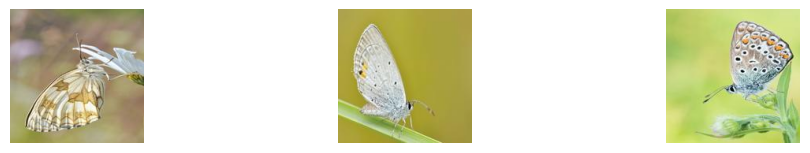

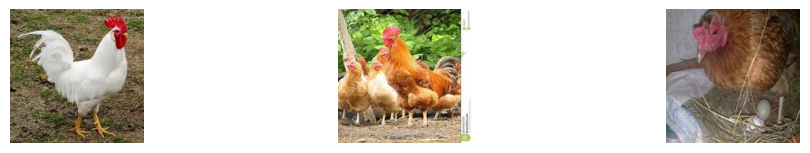

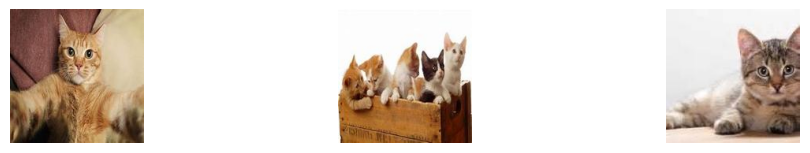

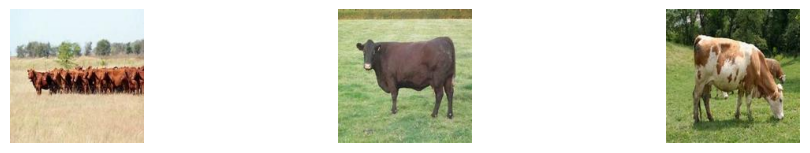

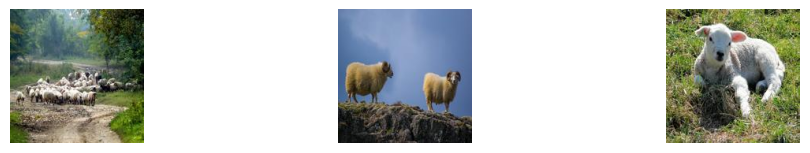

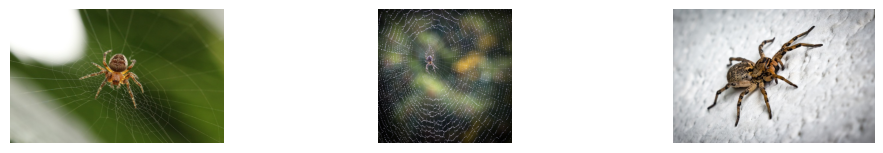

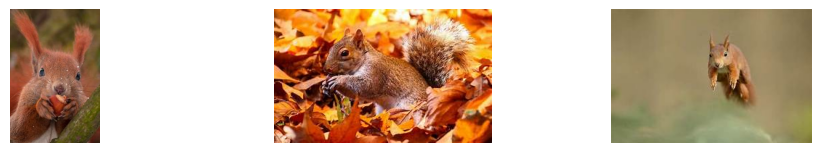

In [6]:
for cl in clases:
    n=3
    plt.figure(figsize=(12, 8))
    a = path+"\\"+cl
    imgs = os.listdir(a)
    i=1
    for _ in range(n):
        img_path = os.path.join(a, imgs[_])
        img = Image.open(img_path)

        plt.subplot(4, n, i)
        plt.imshow(img)
        plt.axis("off")
        i += 1

Analyze avg size

In [7]:
width = ([])
height = ([])
for cl in clases:
    a = path+"\\"+cl
    b = len(os.listdir(a))
    imgs = os.listdir(a)
    for im in imgs:
        im = Image.open(img_path)
        h, w = im.size
        width.append(w)
        height.append(h)
    print("\n"+cl)
    print(sum(width)/b)
    print(sum(height)/b)


cane
200.0
300.0

cavallo
570.7967975600458
856.1951963400686

elefante
1235.408022130014
1853.1120331950208

farfalla
1045.8333333333333
1568.75

gallina
912.9761136216914
1369.4641704325372

gatto
1895.68345323741
2843.5251798561153

mucca
1894.5337620578778
2841.8006430868168

pecora
2142.4175824175823
3213.6263736263736

ragno
1008.7948558390375
1513.1922837585564

scoiattolo
2811.922663802363
4217.883995703544


Resize

Smth abit wrong with it

In [16]:
# TARGET_SIZE = (170, 170)
# skipped = 0
# count = 0
# errors = 0

# for cl in clases:
#     folder = os.path.join(path, cl)

#     for img_name in os.listdir(folder):
#         img_path = os.path.join(folder, img_name)

#         try:
#             with Image.open(img_path) as img:
#                 if img.size == TARGET_SIZE:
#                     skipped += 1
#                     continue

#                 img = img.resize(TARGET_SIZE)
#                 img.save(img_path)
#                 count += 1

#         except Exception:
#             errors += 1
#             print("Error opening:", img_path)

#             try:
#                 os.remove(img_path)
#                 print("deleted.")
#             except:
#                 print("cannot delete.")


In [12]:
files = []
labels = []
class_names = sorted(os.listdir(path))

class_to_idx = {c: i for i, c in enumerate(class_names)}

for cl in clases:
    a = path+"\\"+cl
    for img in os.listdir(a):
        files.append(os.path.join(a, img))
        labels.append(class_to_idx[cl])

In [13]:
train_files, test_files, train_labels, test_labels = train_test_split(
    files, labels,
    test_size=0.2,
    stratify=labels,
    shuffle=True,
    random_state=42
)

In [ ]:
Budeme vyuzivat accuracy a f1

In [14]:
train_transform = transforms.Compose([
    transforms.Resize((170, 170)),
    transforms.RandomHorizontalFlip(p=0.1),
    transforms.RandomRotation(5),
    transforms.ColorJitter(
        brightness=0.15,
        contrast=0.15
    ),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [ ]:
test_transform = transforms.Compose([
    transforms.Resize((170, 170)),
    transforms.ToTensor(),

    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
